# Using Tensorflow and Keras to Classify Images of Fruit

In [1]:
from __future__ import print_function

import matplotlib.pyplot as plt 
from PIL import Image 
import seaborn as sns
import pandas as pd 
import numpy as np 
import os
from keras.preprocessing import image
import random
from keras import utils
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import classification_report


import keras
from keras.models import Model
from keras.layers import Input, Dense, TimeDistributed
from keras.layers import LSTM
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

%matplotlib inline 

Using TensorFlow backend.


In [2]:
# Import the dataset
from keras.datasets import mnist

# Import various componenets for model building
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model
from keras.optimizers import RMSprop

# Import the backend
from keras import backend as K

## Data Preprocessing

In [3]:

# Get the categories for each label

data_path = '/Users/Amechi/Documents/Python Files/fruits/fruits-360/Training'
CATEGORIES = []

file_list = os.listdir(data_path)
file_list.remove('.DS_Store')

for filename in file_list:
    CATEGORIES.append(filename)
print(CATEGORIES)       

['Cherry 1', 'Strawberry', 'Pomegranate', 'Guava', 'Apple Red 1', 'Mandarine', 'Raspberry', 'Banana Red', 'Grape White 4']


### Training Data

In [4]:
%%time

# Loading Training data

training_data=[]
n_categories=[]

def create_training_data():
    for category in CATEGORIES:
        folder_path = os.path.join(data_path, category).replace("\\","/")
        class_num = CATEGORIES.index(category)
        counter = 0
        for i in os.listdir(folder_path):
            try:
                img_path = os.path.join(folder_path, i).replace("\\","/")
                img = image.load_img(img_path, target_size=(224, 224))
                img = image.img_to_array(img)
                training_data.append([img, class_num])
                counter += 1
            except Exception as e:
                pass
        n_categories.append(counter)
create_training_data()

CPU times: user 3.79 s, sys: 1.56 s, total: 5.35 s
Wall time: 6.63 s


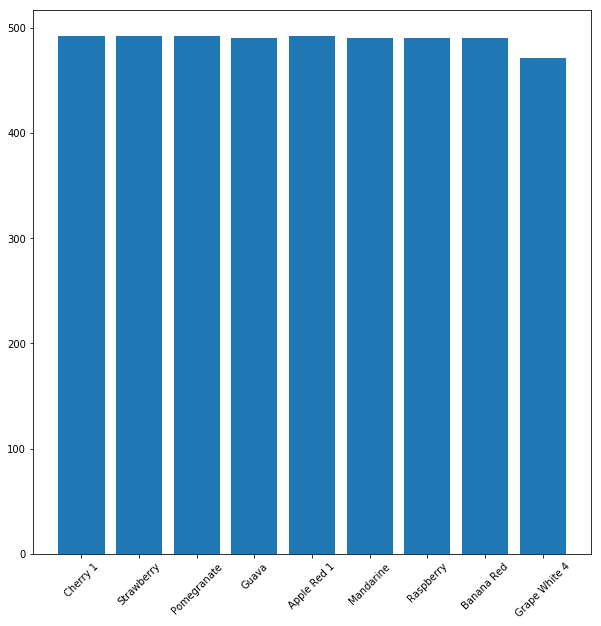

In [5]:
# Visualizing Fruit Frequencies of training data

plt.figure(figsize=(10,10))
plt.bar(CATEGORIES, n_categories)
plt.xticks(CATEGORIES, rotation=45)
plt.show()

In [6]:
%%time
# Preparing training data for CNN

random.shuffle(training_data)

X_train = []
Y_train = []
for img, class_num in training_data:
    X_train.append(img)
    Y_train.append(class_num)

X_train = np.array(X_train).reshape(-1, 224, 224, 3)
Y_train = np.array(Y_train)
X_train.shape

CPU times: user 1.3 s, sys: 2.71 s, total: 4.01 s
Wall time: 4.41 s


### Testing Data

In [7]:
# Loading Test data

testing_data = []
n_test_categories = []
test_path = '/Users/Amechi/Documents/Python Files/fruits/fruits-360/Test'
test_CATEGORIES = []

test_list = os.listdir(test_path)
test_list.remove('.DS_Store')

for filename in test_list:
    test_CATEGORIES.append(filename)      

def create_test_data():
    for category in test_CATEGORIES:
        folder_path = os.path.join(test_path, category).replace("\\","/")
        class_num = test_CATEGORIES.index(category)
        counter = 0
        for i in os.listdir(folder_path):
            try:
                img_path = os.path.join(folder_path, i).replace("\\","/")
                img = image.load_img(img_path, target_size=(224, 224))
                img = image.img_to_array(img)
                testing_data.append([img, class_num])
                counter += 1
            except Exception as e:
                pass
        n_test_categories.append(counter)
create_test_data()


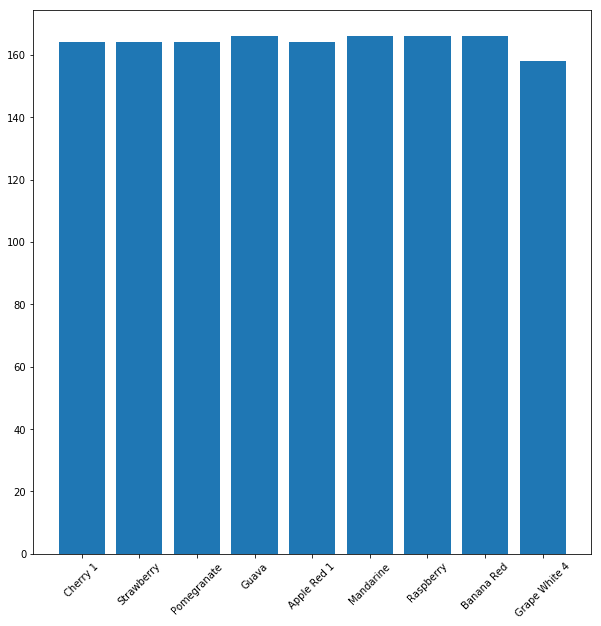

In [8]:
# Visualizing Fruit Frequencies of testing data

plt.figure(figsize=(10,10))
plt.bar(test_CATEGORIES, n_test_categories)
plt.xticks(test_CATEGORIES, rotation=45)
plt.show()

In [9]:
# Prepare test data

random.shuffle(testing_data)

X_test = []
Y_test = []
for img, class_num in testing_data:
    X_test.append(img)
    Y_test.append(class_num)

X_test = np.array(X_test).reshape(-1, 224, 224, 3)
X_test.shape

(1478, 224, 224, 3)

In [10]:
Y_train_2,Y_test_2 = Y_train,Y_test

In [11]:
# Preparing Outcome Variables
Y_train = utils.to_categorical(Y_train, num_classes=len(n_categories))
Y_test = utils.to_categorical(Y_test, num_classes=len(n_test_categories))

# Normalizing Data
X_train_ = X_train/255
X_test_ = X_test/255



In [12]:
x_train,y_train = X_train_ , Y_train
x_val,y_val = X_test_ , Y_test
x_test,y_test = x_val,y_val

## Modeling the Data

### Control - 10 Epochs, Image Augmentation

In [13]:

## Building the Model

model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(5,5),padding="Same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=16,kernel_size=(4,4),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32,kernel_size=(4,4),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(9,activation="softmax"))

# optimization
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)

# compiling the model
model.compile(optimizer=optimizer,loss="binary_crossentropy",metrics=["accuracy"])

epochs=10
batch_size=36

W0827 07:49:33.015320 4665734592 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0827 07:49:33.099858 4665734592 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0827 07:49:33.125796 4665734592 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0827 07:49:33.166163 4665734592 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0827 07:49:33.169606 4665734592 deprecation_wrapper.py:119] From /usr/loca

In [14]:
%%time

# Adding Variations of original photos to prevent overfiting

datagen=ImageDataGenerator(featurewise_center=False, 
                           samplewise_center=False,  
                           featurewise_std_normalization=False, 
                           samplewise_std_normalization=False,  
                           zca_whitening=False,  
                           rotation_range=0.5,    
                           zoom_range=0.5,        
                           width_shift_range=0.5, 
                           height_shift_range=0.5,
                           horizontal_flip=False,  
                           vertical_flip=False,
                           )
datagen.fit(x_train)

#model fitting
history=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),epochs=epochs,
                            validation_data=(x_val,y_val),steps_per_epoch=x_train.shape[0]//batch_size
                           )

Epoch 1/10
122/122 [==============================] - 116s 955ms/step - loss: 0.3941 - acc: 0.8851 - val_loss: 0.3423 - val_acc: 0.8889
Epoch 2/10
122/122 [==============================] - 130s 1s/step - loss: 0.2897 - acc: 0.8969 - val_loss: 0.2538 - val_acc: 0.9006
Epoch 3/10
122/122 [==============================] - 113s 927ms/step - loss: 0.2445 - acc: 0.9015 - val_loss: 0.1915 - val_acc: 0.9120
Epoch 4/10
122/122 [==============================] - 115s 943ms/step - loss: 0.2081 - acc: 0.9157 - val_loss: 0.2018 - val_acc: 0.9053
Epoch 5/10
122/122 [==============================] - 116s 953ms/step - loss: 0.1865 - acc: 0.9187 - val_loss: 0.1447 - val_acc: 0.9414
Epoch 6/10
122/122 [==============================] - 116s 952ms/step - loss: 0.1449 - acc: 0.9385 - val_loss: 0.1172 - val_acc: 0.9488
Epoch 7/10
122/122 [==============================] - 118s 965ms/step - loss: 0.1138 - acc: 0.9520 - val_loss: 0.0961 - val_acc: 0.9554
Epoch 8/10
122/122 [==============================]

In [15]:
pred =  model.predict_classes(x_val)
print(classification_report(Y_test_2, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00       164
           2       1.00      0.43      0.60       164
           3       1.00      1.00      1.00       166
           4       0.55      1.00      0.71       164
           5       1.00      1.00      1.00       166
           6       1.00      1.00      1.00       166
           7       1.00      0.75      0.86       166
           8       1.00      1.00      1.00       158

   micro avg       0.91      0.91      0.91      1478
   macro avg       0.95      0.91      0.91      1478
weighted avg       0.95      0.91      0.91      1478



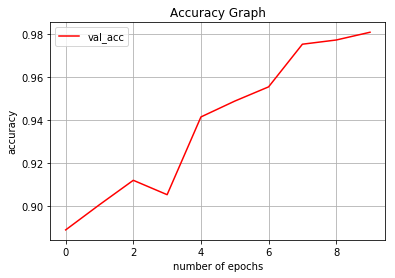

In [16]:
## Visualizing Model Accuracy

plt.plot(history.history["val_acc"],color="r",label="val_acc")
plt.title("Accuracy Graph")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

Accuracy generally increased as the number of epochs increased.

### 10 Epochs, Reduced Image Augmentation

In [17]:

## Building the Model

model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(5,5),padding="Same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=16,kernel_size=(4,4),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32,kernel_size=(4,4),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(9,activation="softmax"))

# optimization
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)

# compiling the model
model.compile(optimizer=optimizer,loss="binary_crossentropy",metrics=["accuracy"])

epochs=10
batch_size=36

In [18]:
%%time

# Adding Variations of Original photos to prevent overfiting

datagen=ImageDataGenerator(featurewise_center=False, 
                           samplewise_center=False,  
                           featurewise_std_normalization=False, 
                           samplewise_std_normalization=False,  
                           zca_whitening=False,  
                           rotation_range=0.01,    
                           zoom_range=0.01,        
                           width_shift_range=0.01, 
                           height_shift_range=0.01,
                           horizontal_flip=False,  
                           vertical_flip=False,
                           )
datagen.fit(x_train)

# model fitting
history=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),epochs=epochs,
                            validation_data=(x_val,y_val),steps_per_epoch=x_train.shape[0]//batch_size
                           )

Epoch 1/10
122/122 [==============================] - 105s 860ms/step - loss: 0.2708 - acc: 0.9304 - val_loss: 0.0526 - val_acc: 0.9809
Epoch 2/10
122/122 [==============================] - 102s 832ms/step - loss: 0.0175 - acc: 0.9940 - val_loss: 0.0461 - val_acc: 0.9848
Epoch 3/10
122/122 [==============================] - 116s 947ms/step - loss: 0.0088 - acc: 0.9972 - val_loss: 0.0357 - val_acc: 0.9868
Epoch 4/10
122/122 [==============================] - 111s 912ms/step - loss: 0.0030 - acc: 0.9989 - val_loss: 0.0185 - val_acc: 0.9929
Epoch 5/10
122/122 [==============================] - 111s 909ms/step - loss: 0.0019 - acc: 0.9995 - val_loss: 0.0290 - val_acc: 0.9878
Epoch 6/10
122/122 [==============================] - 118s 965ms/step - loss: 0.0071 - acc: 0.9978 - val_loss: 0.0835 - val_acc: 0.9802
Epoch 7/10
122/122 [==============================] - 111s 911ms/step - loss: 0.0032 - acc: 0.9990 - val_loss: 0.0132 - val_acc: 0.9935
Epoch 8/10
122/122 [============================

In [19]:
pred =  model.predict_classes(x_val)
print(classification_report(Y_test_2, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      0.98      0.99       164
           2       1.00      1.00      1.00       164
           3       0.95      1.00      0.98       166
           4       1.00      1.00      1.00       164
           5       1.00      0.95      0.98       166
           6       0.97      1.00      0.98       166
           7       0.98      0.96      0.97       166
           8       1.00      1.00      1.00       158

   micro avg       0.99      0.99      0.99      1478
   macro avg       0.99      0.99      0.99      1478
weighted avg       0.99      0.99      0.99      1478



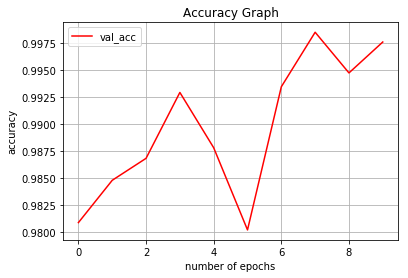

In [20]:
## Visualizing Model Accuracy

plt.plot(history.history["val_acc"],color="r",label="val_acc")
plt.title("Accuracy Graph")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

Reducing the image augmentation actually resulted in higher accuracy scores. The increased risk of overfitting may become more evident with larger datasets. However, this model is the most preferable for classifying the fruit because of the extremely high accuracy.

### 10 Epochs, Image Augmentation, Reduced Convolution

In [21]:

## Building the Model

model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(5,5),padding="Same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32,kernel_size=(4,4),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(9,activation="softmax"))

# optimization
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)

# compiling the model
model.compile(optimizer=optimizer,loss="binary_crossentropy",metrics=["accuracy"])

epochs=10
batch_size=36

In [22]:
%%time

# Adding Variations of Original photos to prevent overfiting

datagen=ImageDataGenerator(featurewise_center=False, 
                           samplewise_center=False,  
                           featurewise_std_normalization=False, 
                           samplewise_std_normalization=False,  
                           zca_whitening=False,  
                           rotation_range=0.5,    
                           zoom_range=0.5,        
                           width_shift_range=0.5, 
                           height_shift_range=0.5,
                           horizontal_flip=False,  
                           vertical_flip=False,
                           )
datagen.fit(x_train)

# model fitting
history=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),epochs=epochs,
                            validation_data=(x_val,y_val),steps_per_epoch=x_train.shape[0]//batch_size
                           )

Epoch 1/10
122/122 [==============================] - 153s 1s/step - loss: 3.1425 - acc: 0.8029 - val_loss: 3.1622 - val_acc: 0.8027
Epoch 2/10
122/122 [==============================] - 150s 1s/step - loss: 3.1614 - acc: 0.8028 - val_loss: 3.1622 - val_acc: 0.8027
Epoch 3/10
122/122 [==============================] - 162s 1s/step - loss: 3.1631 - acc: 0.8027 - val_loss: 3.1622 - val_acc: 0.8027
Epoch 4/10
122/122 [==============================] - 207s 2s/step - loss: 3.1688 - acc: 0.8023 - val_loss: 3.1622 - val_acc: 0.8027
Epoch 5/10
122/122 [==============================] - 191s 2s/step - loss: 3.1623 - acc: 0.8027 - val_loss: 3.1622 - val_acc: 0.8027
Epoch 6/10
122/122 [==============================] - 183s 1s/step - loss: 3.1623 - acc: 0.8027 - val_loss: 3.1622 - val_acc: 0.8027
Epoch 7/10
122/122 [==============================] - 185s 2s/step - loss: 3.1639 - acc: 0.8026 - val_loss: 3.1622 - val_acc: 0.8027
Epoch 8/10
122/122 [==============================] - 185s 2s/step - 

In [23]:
pred =  model.predict_classes(x_val)
print(classification_report(Y_test_2, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       164
           1       0.00      0.00      0.00       164
           2       0.00      0.00      0.00       164
           3       0.00      0.00      0.00       166
           4       0.00      0.00      0.00       164
           5       0.00      0.00      0.00       166
           6       0.00      0.00      0.00       166
           7       0.11      1.00      0.20       166
           8       0.00      0.00      0.00       158

   micro avg       0.11      0.11      0.11      1478
   macro avg       0.01      0.11      0.02      1478
weighted avg       0.01      0.11      0.02      1478



/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


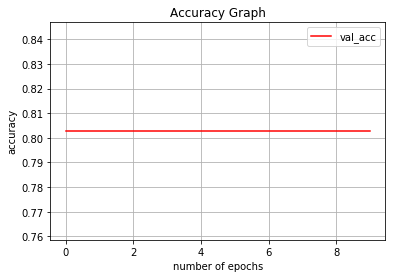

In [24]:
## Visualizing Model Accuracy

plt.plot(history.history["val_acc"],color="r",label="val_acc")
plt.title("Accuracy Graph")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

Computational complexity increased runtimes significantly. Accuracy also took a notable drop.

### 10 Epochs, Image Augmentation, Increased Batch Size

In [25]:
## Building the Model

model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(5,5),padding="Same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=16,kernel_size=(4,4),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32,kernel_size=(4,4),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(9,activation="softmax"))

# optimization
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)

# compiling the model
model.compile(optimizer=optimizer,loss="binary_crossentropy",metrics=["accuracy"])

epochs=10
batch_size=72

In [26]:
%%time

# Adding Variations of Original photos to prevent overfiting

datagen=ImageDataGenerator(featurewise_center=False, 
                           samplewise_center=False,  
                           featurewise_std_normalization=False, 
                           samplewise_std_normalization=False,  
                           zca_whitening=False,  
                           rotation_range=0.5,    
                           zoom_range=0.5,        
                           width_shift_range=0.5, 
                           height_shift_range=0.5,
                           horizontal_flip=False,  
                           vertical_flip=False,
                           )
datagen.fit(x_train)

# model fitting
history=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),epochs=epochs,
                            validation_data=(x_val,y_val),steps_per_epoch=x_train.shape[0]//batch_size
                           )

Epoch 1/10
61/61 [==============================] - 103s 2s/step - loss: 0.5410 - acc: 0.8776 - val_loss: 0.3477 - val_acc: 0.8889
Epoch 2/10
61/61 [==============================] - 131s 2s/step - loss: 0.3075 - acc: 0.8913 - val_loss: 0.2402 - val_acc: 0.9014
Epoch 3/10
61/61 [==============================] - 123s 2s/step - loss: 0.2309 - acc: 0.9084 - val_loss: 0.2439 - val_acc: 0.8873
Epoch 4/10
61/61 [==============================] - 122s 2s/step - loss: 0.1626 - acc: 0.9301 - val_loss: 0.1062 - val_acc: 0.9592
Epoch 5/10
61/61 [==============================] - 112s 2s/step - loss: 0.1361 - acc: 0.9419 - val_loss: 0.0636 - val_acc: 0.9797
Epoch 6/10
61/61 [==============================] - 116s 2s/step - loss: 0.1096 - acc: 0.9542 - val_loss: 0.0657 - val_acc: 0.9796
Epoch 7/10
61/61 [==============================] - 115s 2s/step - loss: 0.0977 - acc: 0.9601 - val_loss: 0.0552 - val_acc: 0.9712
Epoch 8/10
61/61 [==============================] - 121s 2s/step - loss: 0.0895 - a

In [27]:
pred =  model.predict_classes(x_val)
print(classification_report(Y_test_2, pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       164
           1       0.88      0.50      0.64       164
           2       0.68      1.00      0.81       164
           3       1.00      1.00      1.00       166
           4       1.00      1.00      1.00       164
           5       1.00      1.00      1.00       166
           6       1.00      1.00      1.00       166
           7       0.97      0.87      0.92       166
           8       1.00      1.00      1.00       158

   micro avg       0.93      0.93      0.93      1478
   macro avg       0.94      0.93      0.93      1478
weighted avg       0.94      0.93      0.93      1478



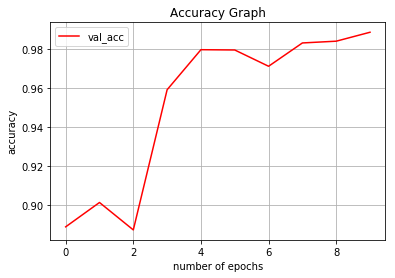

In [28]:
## Visualizing Model Accuracy

plt.plot(history.history["val_acc"],color="r",label="val_acc")
plt.title("Accuracy Graph")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

Increasing the batch size significantly reduced runtime and computational complexity. There was a significant drop in accuracy, however.

### 10 Epochs With RNN

In [30]:

# Training parameters.
batch_size = 64
num_classes = 9
epochs = 10

# Embedding dimensions.
row_hidden = 8
col_hidden = 8

# Reshapes data to 4D for Hierarchical RNN.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

row, col, pixel = x_train.shape[1:]

# 4D input.
x = Input(shape=(row, col, pixel))

# Encodes a row of pixels using TimeDistributed Wrapper.
encoded_rows = TimeDistributed(LSTM(row_hidden))(x)

# Encodes columns of encoded rows.
encoded_columns = LSTM(col_hidden)(encoded_rows)

# Final predictions and model.
prediction = Dense(num_classes, activation='softmax')(encoded_columns)
model = Model(x, prediction)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Training.
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

# Evaluation.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

x_train shape: (4399, 224, 224, 3)
4399 train samples
1478 test samples
Train on 4399 samples, validate on 1478 samples
Epoch 1/10
 576/4399 [==>...........................] - ETA: 1:55 - loss: 2.2021 - acc: 0.0903

KeyboardInterrupt: 

In [ ]:
pred =  model.predict_classes(x_test)
print(classification_report(Y_test_2, pred))

In [ ]:
## Visualizing Model Accuracy

plt.plot(model.history["val_acc"],color="r",label="val_acc")
plt.title("Accuracy Graph")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()